In [4]:
#imports here
import pandas as pd
import matplotlib.pyplot as plt

## Test-Train Split

Time series split on June 25th 2018

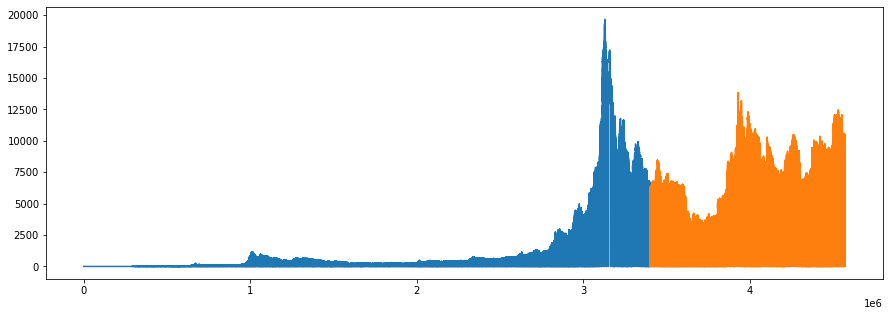

In [12]:
#plot test train data sets
df = pd.read_csv("../data/processed/bitstampUSD.csv")
train_data = df.loc[df["Timestamp"] <= 1529899200]
test_data = df.loc[df["Timestamp"] > 1529899200]
train_data = train_data["Weighted_Price"]
test_data = test_data["Weighted_Price"]

plt.figure(figsize=(15,5))
plt.plot(train_data)
plt.plot(test_data)
plt.show()

## Predicted Output

In [23]:
#plot truth vs predicted serial vs predicted parallel
keras_pred = pd.read_csv("../data/predictions/keras_y_pred.csv")
elephas_pred = pd.read_csv("../data/predictions/elephas_y_pred.csv")

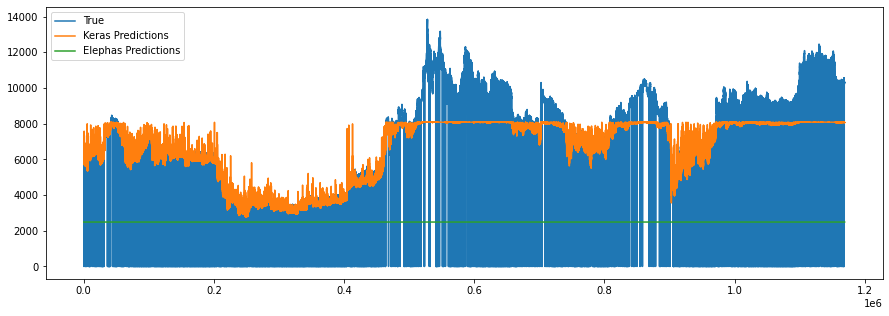

In [26]:
# test_data = test_data["Weighted_Price"]

plt.figure(figsize=(15,5))
plt.plot(test_data)
plt.plot(keras_pred)
plt.plot(elephas_pred)
plt.legend(["True", "Keras Predictions", "Elephas Predictions"])
plt.show()

## Model Comparisons

- Plot time to fit comparison
- Plot MSE or MAE comparison

In [ ]:
# plot error for each model
